<a href="https://colab.research.google.com/github/jrgee/CMPE297-98/blob/master/LeNet_and_VGG16_for_Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 450kB 33.5MB/s 
     |████████████████████████████████| 3.8MB 27.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [3]:
from os import path
if not(path.exists('train')):
  print('Unzipping files')
  !unzip -q '/content/drive/My Drive/297-98/train.zip'
  print('finished train')
  !unzip -q '/content/drive/My Drive/297-98/val.zip'
  print('finished val')
else:
  print('Already loaded')

Unzipping files
finished train
finished val


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time

from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.test.is_gpu_available())

2.0.0
True


In [0]:
def build_lenet():
  model = keras.Sequential()

  model.add(Conv2D(filters=6, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
  model.add(AveragePooling2D())
  model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
  model.add(AveragePooling2D())
  model.add(Flatten())
  model.add(Dense(units=120, activation='relu'))
  model.add(Dense(units=84, activation='relu'))
  model.add(Dense(units=2, activation = 'softmax'))

  return model

In [0]:
def build_vggnet():
  model = keras.Sequential()

  model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
  model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=4096,activation="relu"))
  model.add(Dense(units=2, activation="softmax"))

  return model


In [4]:
BATCH = 64

imagegen = ImageDataGenerator()


train_lenet = imagegen.flow_from_directory(directory='/content/train',
                                           batch_size=BATCH, target_size=(32,32))
val_lenet = imagegen.flow_from_directory(directory='/content/val',
                                         batch_size=BATCH, target_size=(32,32))

Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [8]:
print('# of batches in test set: ' + str(len(train_vgg)))

# of batches in test set: 356


In [0]:
early = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')

In [10]:
opt = Adam(lr=0.001)

lenet = build_lenet()
lenet.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [11]:
start = time.time()
lenet_history = lenet.fit_generator(generator=train_lenet, epochs=50, steps_per_epoch=len(train_lenet), 
                                    validation_data=val_lenet, validation_steps=len(val_lenet), callbacks=[early])

print('took ' + str((time.time()-start)/60) + ' minutes')

Epoch 1/50
356/356 [==============================] - 75s 209ms/step - loss: 1.1576 - accuracy: 0.5876 - val_loss: 0.6399 - val_accuracy: 0.6535
Epoch 2/50
356/356 [==============================] - 71s 200ms/step - loss: 0.6057 - accuracy: 0.6710 - val_loss: 0.6016 - val_accuracy: 0.6854
Epoch 3/50
356/356 [==============================] - 71s 199ms/step - loss: 0.5600 - accuracy: 0.7109 - val_loss: 0.5907 - val_accuracy: 0.6958
Epoch 4/50
356/356 [==============================] - 70s 198ms/step - loss: 0.5341 - accuracy: 0.7301 - val_loss: 0.5494 - val_accuracy: 0.7277
Epoch 5/50
356/356 [==============================] - 70s 198ms/step - loss: 0.5017 - accuracy: 0.7530 - val_loss: 0.5588 - val_accuracy: 0.7169
Epoch 6/50
356/356 [==============================] - 70s 198ms/step - loss: 0.4780 - accuracy: 0.7670 - val_loss: 0.5630 - val_accuracy: 0.7138
Epoch 7/50
356/356 [==============================] - 70s 198ms/step - loss: 0.4455 - accuracy: 0.7909 - val_loss: 0.5791 - val_ac

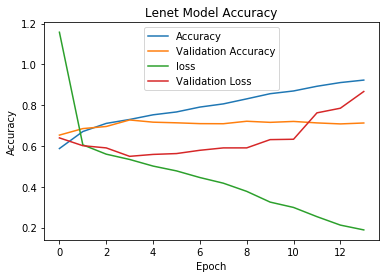

In [12]:
plt.plot(lenet_history.history["accuracy"])
plt.plot(lenet_history.history['val_accuracy'])
plt.plot(lenet_history.history['loss'])
plt.plot(lenet_history.history['val_loss'])
plt.title("Lenet Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [6]:
opt = Adam(lr=0.002)

vgg = build_vggnet()
vgg.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

vgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [7]:
train_vgg = imagegen.flow_from_directory(directory='/content/train',
                                         batch_size=BATCH, target_size=(224,224))
val_vgg = imagegen.flow_from_directory(directory='/content/val',
                                       batch_size=BATCH, target_size=(224,224))

Found 22778 images belonging to 2 classes.
Found 2222 images belonging to 2 classes.


In [8]:
start = time.time()
vgg_history = vgg.fit_generator(generator=train_vgg, epochs=50, steps_per_epoch=len(train_vgg), 
                                validation_data=val_vgg, validation_steps=len(val_vgg), callbacks=[early])
print('took ' + str((time.time()-start)/60) + ' minutes')

Epoch 1/50
356/356 [==============================] - 881s 2s/step - loss: 8.0417 - accuracy: 0.4996 - val_loss: 8.0450 - val_accuracy: 0.5000
Epoch 2/50
356/356 [==============================] - 852s 2s/step - loss: 8.0592 - accuracy: 0.5000 - val_loss: 8.0506 - val_accuracy: 0.5000
Epoch 3/50
356/356 [==============================] - 852s 2s/step - loss: 8.0588 - accuracy: 0.5000 - val_loss: 8.0478 - val_accuracy: 0.5000
Epoch 4/50
356/356 [==============================] - 853s 2s/step - loss: 8.0592 - accuracy: 0.5000 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 5/50
356/356 [==============================] - 852s 2s/step - loss: 8.0595 - accuracy: 0.5000 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 6/50
356/356 [==============================] - 852s 2s/step - loss: 8.0592 - accuracy: 0.5000 - val_loss: 8.0534 - val_accuracy: 0.5000
Epoch 7/50
356/356 [==============================] - 852s 2s/step - loss: 8.0582 - accuracy: 0.5000 - val_loss: 8.0590 - val_accuracy: 0.5000

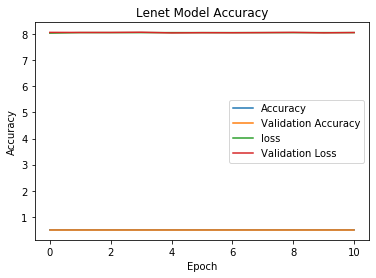

In [8]:
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("Lenet Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()